<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework7 KNN

## Boilerplate from lecture

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
all_data = pd.read_csv('datasets/forest_dataset.csv')

In [3]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [4]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [5]:
clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

In [6]:
accuracy_score(test_labels, y_pred)

0.6075

In [7]:
clf = LogisticRegression(solver='saga')

# init GridSearchCV with parameters
param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

/home/artemint/anaconda3/envs/selML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/artemint/anaconda3/envs/selML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/artemint/anaconda3/envs/selML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/artemint/anaconda3/envs/selML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/artemint/anaconda3/envs/selML/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 3, 'penalty': 'l2'}


In this case, the search iterates over all possible pairs of values for `C` and `penalty` from the specified sets.


In [8]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6417

## Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [9]:
# Your code here
clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

`Accuracy`:

In [10]:
accuracy_score(test_labels, y_pred)

0.7365

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [11]:
params={
    'n_neighbors': np.arange(1, 10),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

clf_grid.fit(train_feature_matrix, train_labels)
None
# print(search.best_params_)

Let's output the best parameters

In [12]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Accuracy on the best params

In [13]:
accuracy_score(test_labels, clf_grid.best_estimator_.predict(test_feature_matrix))

0.785

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [14]:
optimal_clf = clf_grid.best_estimator_
pred_prob = optimal_clf.predict_proba((test_feature_matrix))

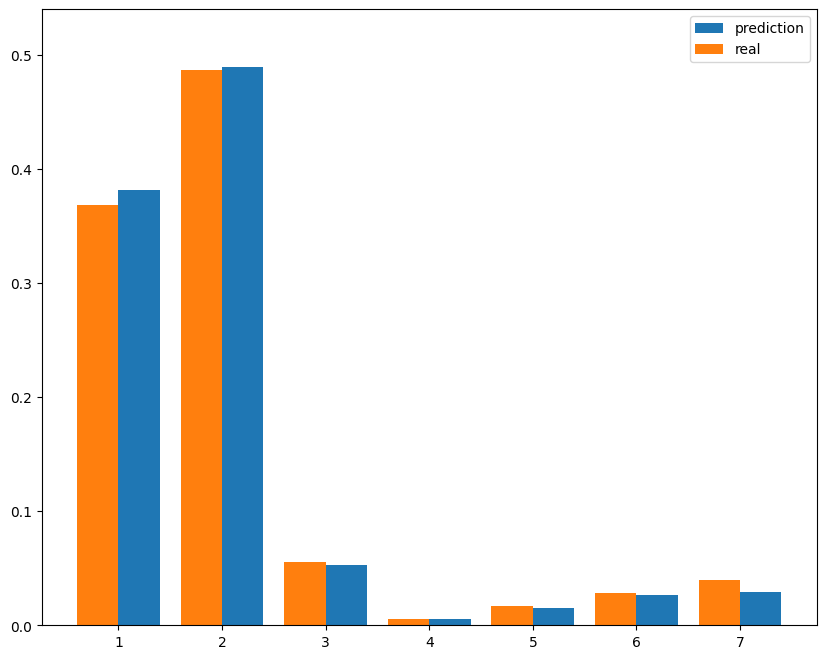

In [15]:


unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

Best KNN accuracy:

In [16]:
accuracy_score(test_labels, clf_grid.best_estimator_.predict(test_feature_matrix))

0.785

Best logistic regression accuracy: 

In [17]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6417

KNN is better for this dataset, because it has higher accuracy score

Pros:
* simple interpretation
* makes no explicit assumptions of original data distribution
* Suitable both for regression and classification

Cons:
* memory uneffective
* computationally expensive
* sensible to the scale of data (Curse of dimensionality)
* it's necessary for metrical proximity mathing with semantic proximity 

### AUC-ROC:

Notice that there are more than 2 classes:

In [18]:
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7])

Let`s try 2 approaches:
* One-vs-All
* All-vs-All

#### One-versus-All

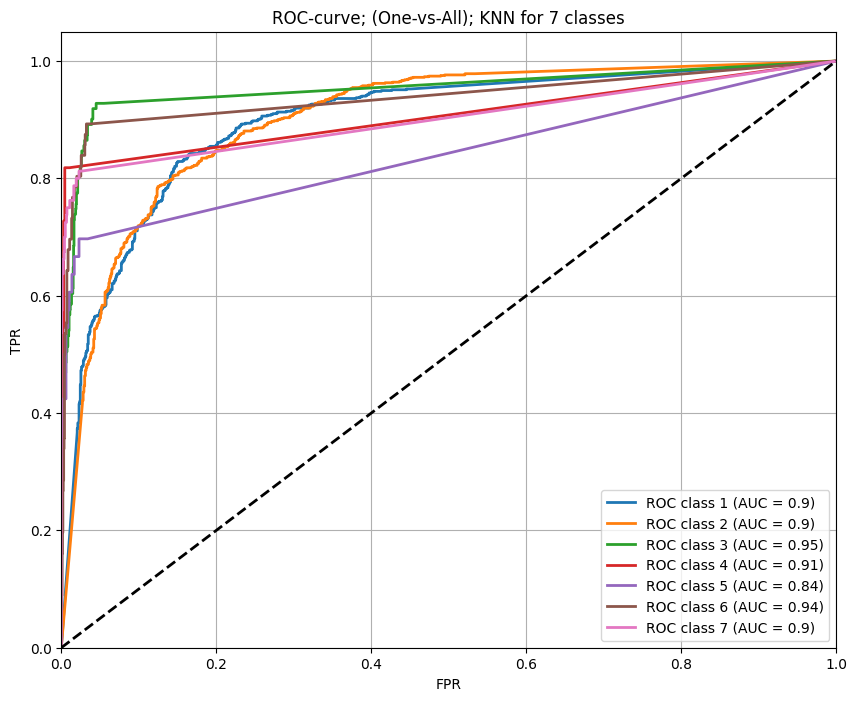

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

N = len(np.unique(labels))

y_scores = optimal_clf.predict_proba((test_feature_matrix))  

y_test_bin = label_binarize(test_labels, classes=np.arange(N)+1)  

plt.figure(figsize=(10, 8))
auc_list =[]
for i in (range(N)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    auc_list+=roc_auc
    plt.plot(fpr, tpr, lw=2,
             label=f'ROC class {i+1} (AUC = {round(roc_auc, 2)})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve; (One-vs-All); KNN for 7 classes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Micro and Macro averages:

In [20]:
micro_auc = roc_auc_score(y_test_bin, y_scores, multi_class="ovr", average="micro")
macro_auc = roc_auc_score(y_test_bin, y_scores, multi_class="ovr", average="macro")

print(f"Micro-Averaged AUC = {micro_auc:.4f}")
print(f"Macro-Averaged AUC = {macro_auc:.4f}")

Micro-Averaged AUC = 0.9557
Macro-Averaged AUC = 0.9058


#### All-vs-All:

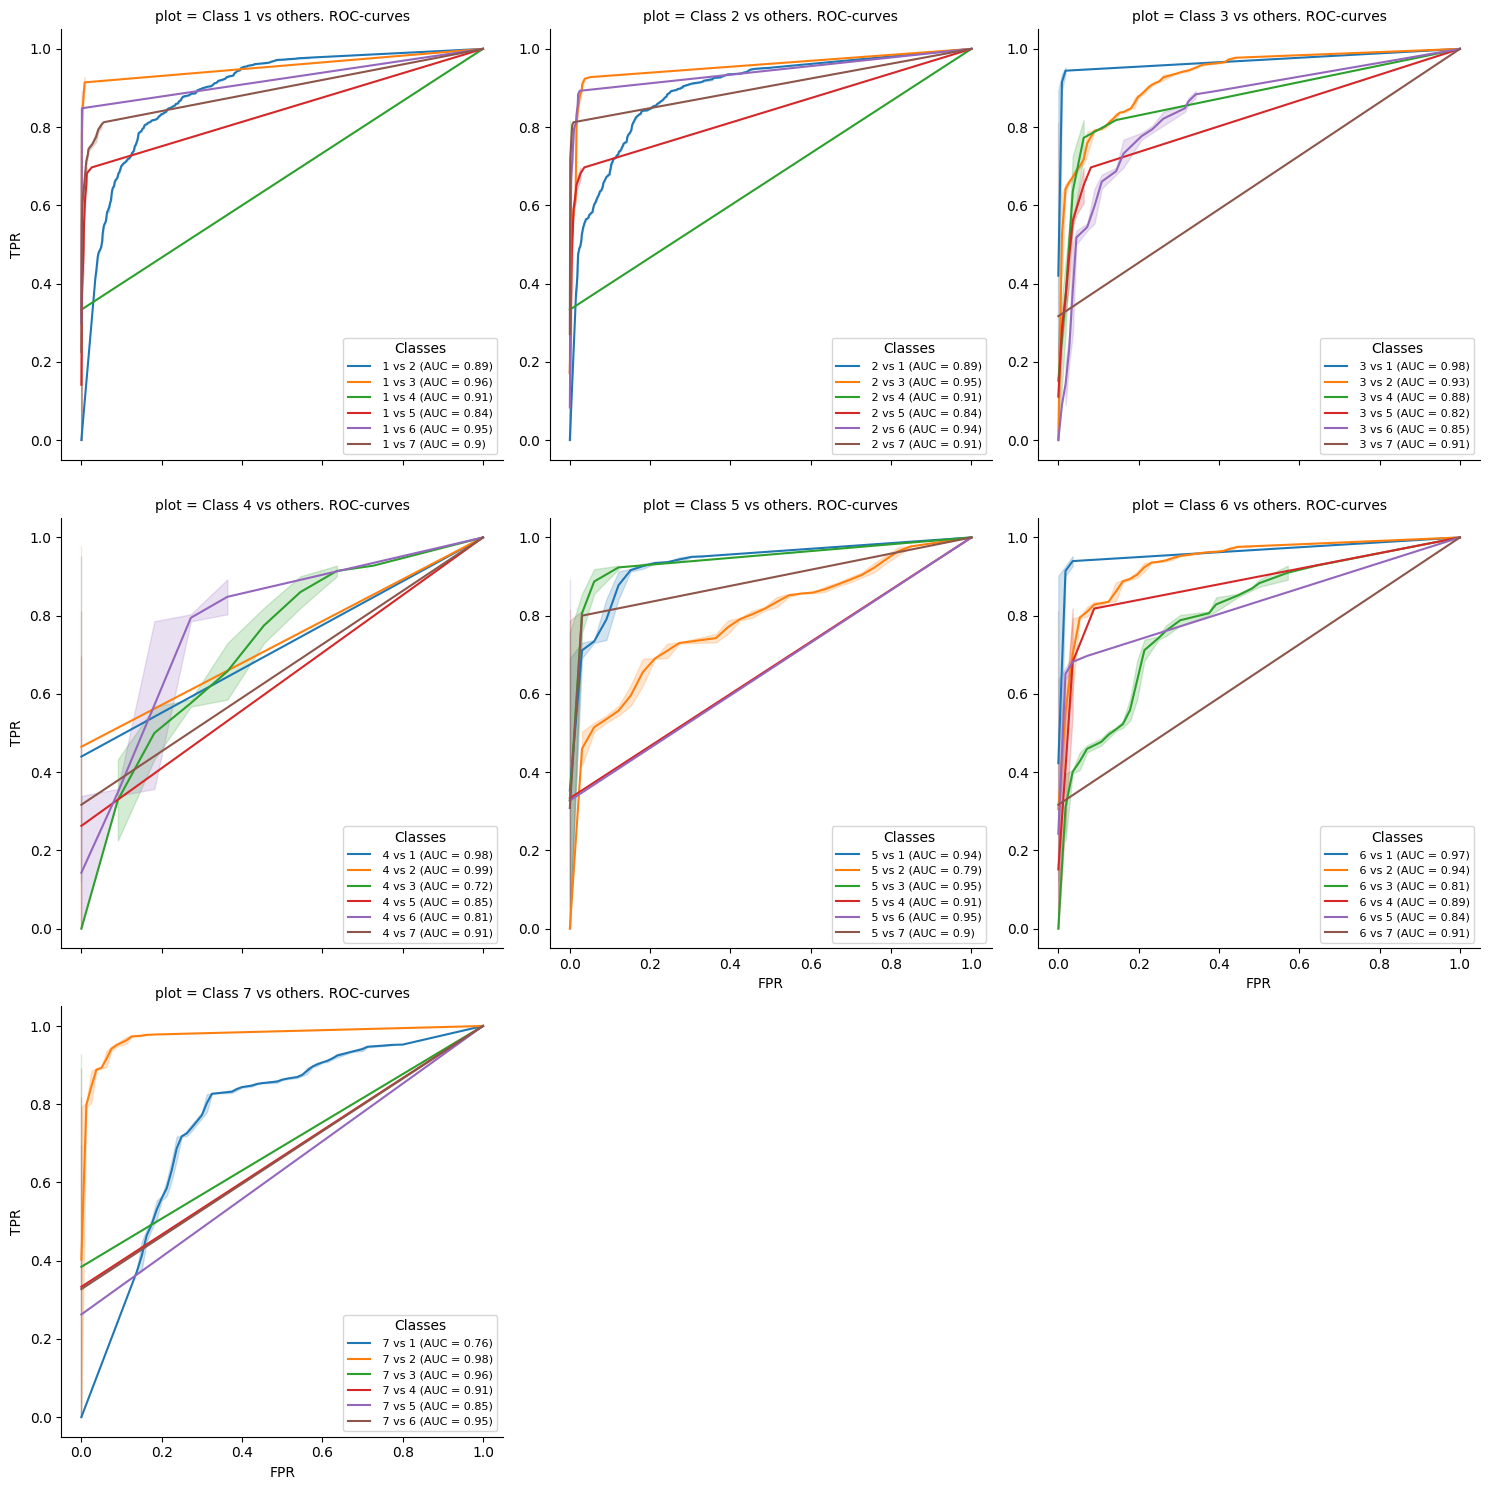

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

N = len(np.unique(labels))

y_probs = y_scores
y_test = test_labels

classes = np.unique(labels)
n_classes = len(classes)
pair_auc = {}

df_list = []
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        mask = np.isin(test_labels, [i+1, j+1])
        y_test_pair = test_labels[mask]
        y_probs_pair = y_scores[mask][:, [i, j]]
        
        # Бинаризуем метки: класс j -> 1, класс i -> 0
        y_bin = (y_test_pair == j+1).astype(int)
        
        y_score = y_probs_pair[:, 1]
        
        fpr, tpr, _ = roc_curve(y_bin, y_score)
        roc_auc = auc(fpr, tpr)
        pair_auc[f"{i} vs {j}"] = roc_auc

        df_list.append(pd.DataFrame({
            "FPR": fpr,
            "TPR": tpr,
            "line": f" {i+1} vs {j+1} (AUC = {round(roc_auc,2)})",
            "plot": f"Class {i+1} vs others. ROC-curves"
        }))
        df = pd.concat(df_list, ignore_index=True)

g = sns.FacetGrid(df, col="plot", col_wrap=3, sharey=False, height=5, legend_out=False)


g.map_dataframe(sns.lineplot, x="FPR", y="TPR", hue="line")


for ax in g.axes.flatten():
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Classes", loc="lower right", fontsize=8, frameon=True)

plt.show()
        # ax_kj.grid(True)
        # # ax_kj.show()


Micro/Macroaverage

In [22]:
from itertools import combinations

In [23]:
all_y_true = []
all_y_score = []
for (i, j) in combinations(classes, 2):
    mask = np.isin(y_test, [i, j])
    all_y_true.extend((y_test[mask] == j).astype(int))
    all_y_score.extend(y_probs[mask, j-1])
micro_auc = roc_auc_score(all_y_true, all_y_score)
macro_auc = np.mean(list(pair_auc.values()))

In [24]:
print(f"Micro AUC Score: {micro_auc:.2f}", f"Macro AUC Score: {macro_auc:.2f}", sep ="\n")

Micro AUC Score: 0.94
Macro AUC Score: 0.90
